## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2025, Prof. J.C. Kao, TAs: B. Qu, K. Pang, S. Dong, S. Rajesh, T. Monsoor, X. Yan

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x + 2x^2 -3x^3 + \epsilon$

Text(0, 0.5, '$y$')

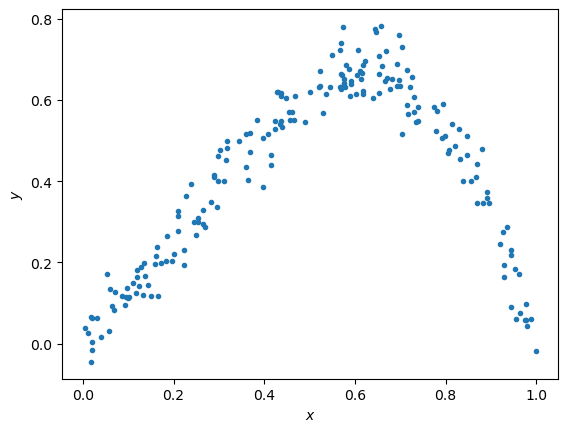

In [2]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x + 2*x**2 - 3*x**3 + np.random.normal(loc=0, scale=0.05, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) $x$ follows a **uniform distribution** in the range [0,1]: 
$$x \sim \text{Uniform}(0,1)$$

(2) The way the noise term $\epsilon$ is added follows a **Gaussian distribution** with:
- Mean ($\mu$) = 0
- Standard deviation ($\sigma$) = 0.05
$$\epsilon \sim \mathcal{N}(0, 0.05^2)$$

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [ ]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

theta = np.linalg.inv(xhat @ xhat.T) @ xhat @ y # please modify this line

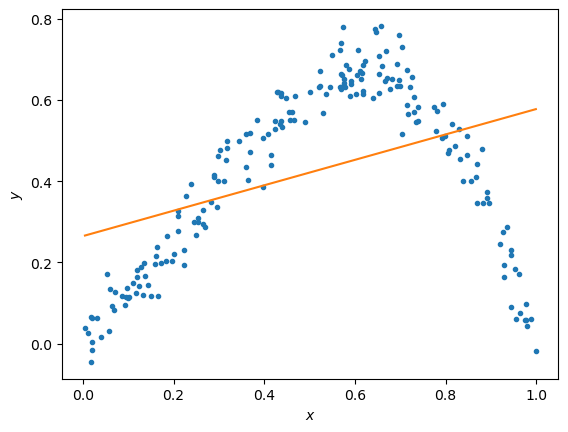

In [4]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) under
(2) use polynomial models with higher order

### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [ ]:
N = 5
xhats = []
thetas = []

# Loop through polynomial orders
for i in range(1, N+1):
    xhat = np.vstack([x**j for j in range(i, -1, -1)])
    theta = np.linalg.inv(xhat @ xhat.T) @ xhat @ y
    xhats.append(xhat)
    thetas.append(theta)

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

pass

# ================== #
# Useful functions #
# range(start, stop, steop) returns a range of numbers from start to stop in steps of step
# ================== #

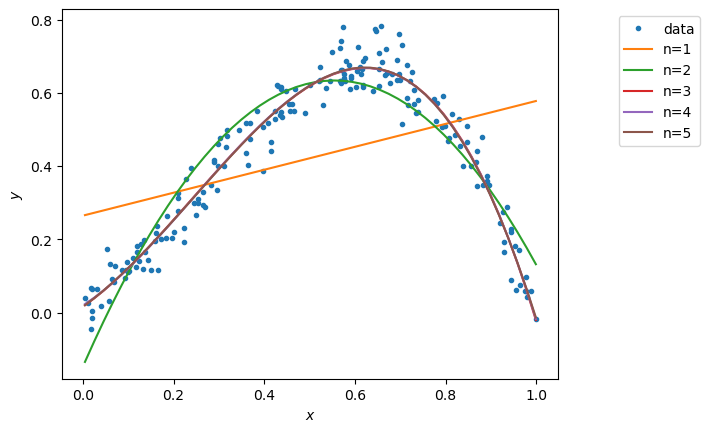

In [12]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x)) # takes the second to last row of plot_x and raises it to the i+1 power                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [ ]:
training_errors = []

for i in np.arange(N):
    training_errors.append(np.sqrt(np.sum((y - thetas[i].dot(xhats[i]))**2) / len(y))) # calculates the RMSE for each model

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
pass # please delete this line (added to prevent an error when empty code is run)

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.20469281558623154, 0.0765524771304268, 0.047637531308789886, 0.04762513848127134, 0.04761383784481757]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) n = 5

(2) higher order

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

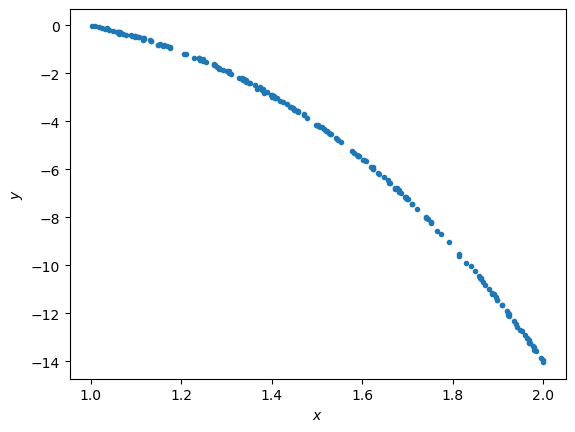

In [15]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x + 2*x**2 - 3*x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [16]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

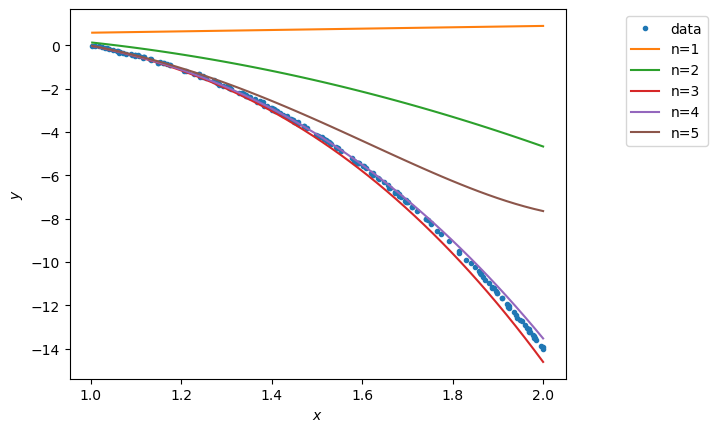

In [17]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [18]:
testing_errors = []

for i in np.arange(N):
    testing_errors.append(np.sqrt(np.sum((y - thetas[i].dot(xhats[i]))**2) / len(y)))

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
pass

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [7.365209957361177, 4.348696266414863, 0.29485356654343003, 0.17444101776828938, 2.4401549799438755]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) 4

(2) Overfitting to noise - capturing unnecessary variations